
## Q.1 
Write a Python code to compute the Fourier transform of the sinc function \( f(x) \) given by:

$$
f(x) = \begin{cases} 
\frac{\sin x}{x}, & \text{if } x \neq 0 \\
1, & \text{otherwise} 
\end{cases}
$$

using NumPy. Make a plot comparing your numerical result with the analytical result.


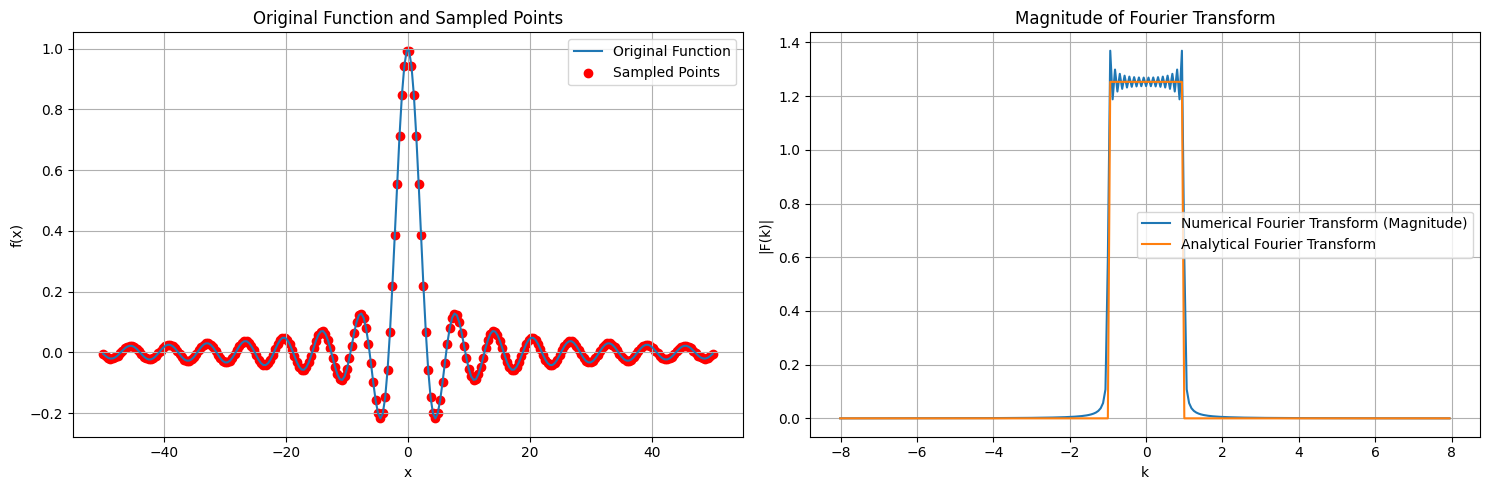

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.where(x == 0, 1, np.sin(x) / x)

# Define parameters
xmin = -50
xmax = 50
n = 256
dx = (xmax - xmin) / (n - 1)

# Compute sample points and the function values at those points
xx = np.linspace(xmin, xmax, n)
sample_value = f(xx)

# Compute the Fourier transform of the sample values
fft_sample = np.fft.fftshift(np.fft.fft(np.fft.fftshift(sample_value),norm='ortho'))

# Define the k-values for the Fourier transform
kk = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(n, dx))

# Compute the integral factor exp(-ikx_min)
int_fact = np.exp(-1j * kk * xmin)

# Compute the numerical Fourier transform with proper scaling
fft_numerical = fft_sample * dx*int_fact*(n/(2*np.pi))**0.5

# Compute the analytical Fourier transform
# analytic fourier transfrom f(k)=(np.pi/2)*0.5  -1<=k=<1  otherwise 0
analytical_ft = np.where(np.abs(kk) <= 1, (np.pi/2)**0.5, 0)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(xx, f(xx), label='Original Function')
plt.scatter(xx, sample_value, label='Sampled Points', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Original Function and Sampled Points')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(kk, np.abs(fft_numerical), label='Numerical Fourier Transform (Magnitude)')
plt.plot(kk, analytical_ft, label="Analytical Fourier Transform")
plt.xlabel('k')
plt.ylabel('|F(k)|')
plt.title('Magnitude of Fourier Transform')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## Q_5.
Take n numbers and write a Python code to compute their DFT using direct computation, i.e., without using FFT. Now compute the same DFT using numpy.fft.fft.
Measure the time taken by the two methods. Now change the number n over a wide
range of values, say from 4 to 100, and repeat the exercise. Make a plot showing the
time taken by the two DFT methods as a function of n.


## part a

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt

def DFT(input_sequence):
    N = len(input_sequence)
    output_sequence = np.zeros(N, dtype=complex)
    
    start_time = time.perf_counter()  # Start time measurement
    
    for q in range(N):  # For each output element
        sum_val = 0
        for p in range(N):  # For each input element
            angle = 2j * np.pi * q * p / N
            sum_val += input_sequence[p] * np.exp(-angle)
        output_sequence[q] = sum_val / np.sqrt(N)
    
    end_time = time.perf_counter()  # End time measurement
    elapsed_time = end_time - start_time
    
    return output_sequence, elapsed_time

# Generate random sequence of numbers
def generate_sequence(n):
    return np.random.rand(n)

x_p = generate_sequence(10)
DFT_direct, elapsed_time_direct_DFT = DFT(x_p)
start_time_fft = time.perf_counter()
dft_using_fft = np.fft.fft(x_p, norm='ortho')
end_time_fft = time.perf_counter()
elapsed_time_fft = end_time_fft - start_time_fft

fourier_trans = np.column_stack((x_p, DFT_direct, dft_using_fft))
print('OUT PUT')
# Print column headings with appropriate spacing
print("Input Sequence               Direct Computation DFT         numpy.fft.fft DFT")

# Iterate over each row and print the elements with proper formatting and spacing
for row in fourier_trans:
    print(f'{row[0].real:+.8f}{row[0].imag:+.8f}j      {row[1].real:+.8f}{row[1].imag:+.8f}j        {row[2].real:+.8f}{row[2].imag:+.8f}j')

print('time taken in Direct Computation DFT =', elapsed_time_direct_DFT)
print("time taken in numpy.fft.fft DFT =", elapsed_time_fft)


OUT PUT
Input Sequence               Direct Computation DFT         numpy.fft.fft DFT
+0.32667608+0.00000000j      +1.66347690+0.00000000j        +1.66347690+0.00000000j
+0.99662949+0.00000000j      +0.10744599-0.11562008j        +0.10744599-0.11562008j
+0.36302085+0.00000000j      +0.06972790+0.03434060j        +0.06972790+0.03434060j
+0.47754369+0.00000000j      -0.03626454-0.19923363j        -0.03626454-0.19923363j
+0.75161224+0.00000000j      -0.33544248-0.01283787j        -0.33544248-0.01283787j
+0.38929379+0.00000000j      -0.24137018-0.00000000j        -0.24137018+0.00000000j
+0.39420383+0.00000000j      -0.33544248+0.01283787j        -0.33544248+0.01283787j
+0.44560585+0.00000000j      -0.03626454+0.19923363j        -0.03626454+0.19923363j
+0.41303516+0.00000000j      +0.06972790-0.03434060j        +0.06972790-0.03434060j
+0.70275487+0.00000000j      +0.10744599+0.11562008j        +0.10744599+0.11562008j
time taken in Direct Computation DFT = 0.00028039998142048717
time taken i

# part b

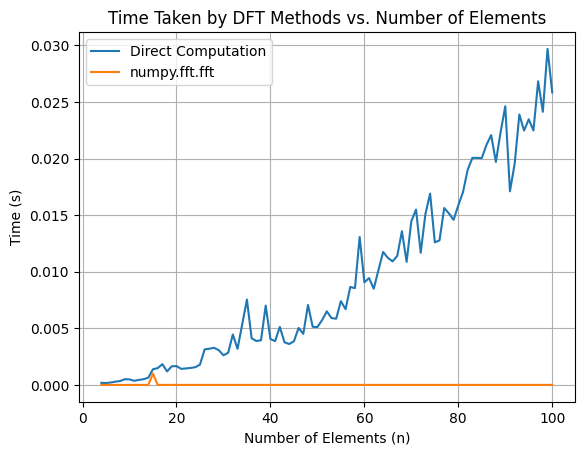

In [29]:
# Range of n values
n_values = list(range(4, 101))

# Measure times for direct computation method
times_direct = []
for n in n_values:
    x = generate_sequence(n)
    _, elapsed_time = DFT(x)
    times_direct.append(elapsed_time)

# Measure times for numpy.fft.fft method
times_fft = []
for n in n_values:
    x = generate_sequence(n)
    start_time = time.time()
    np.fft.fft(x)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_fft.append(elapsed_time)

# Plotting
plt.plot(n_values, times_direct, label='Direct Computation')
plt.plot(n_values, times_fft, label='numpy.fft.fft')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (s)')
plt.title('Time Taken by DFT Methods vs. Number of Elements')
plt.legend()
plt.grid(True)
plt.show()


## Q_6.
 Write a Python code to compute the Fourier transform of a constant function.
 let constant function f(x)=1 

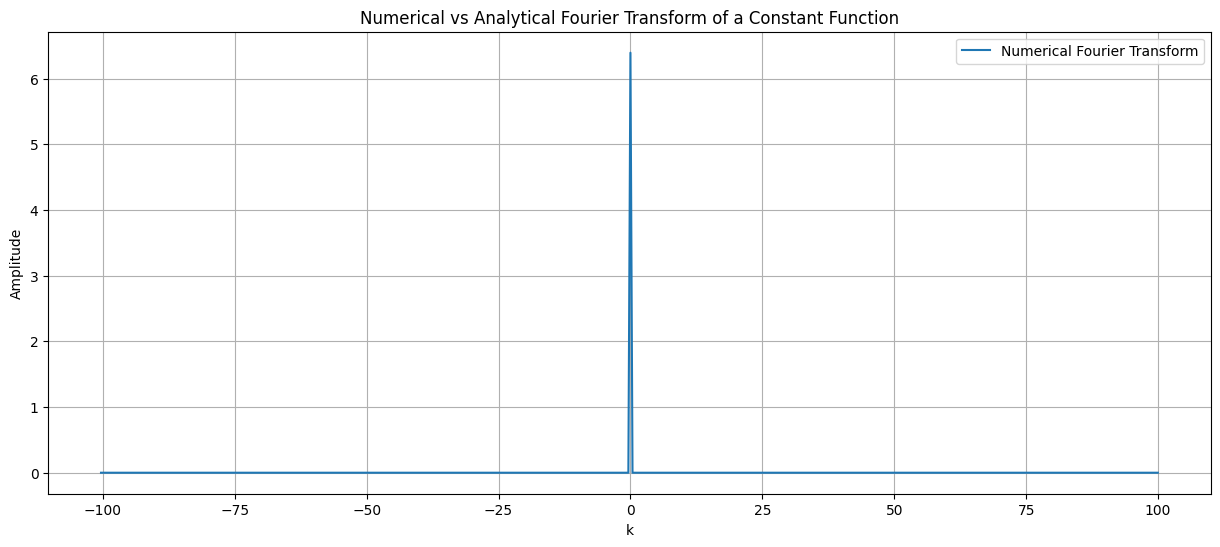

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def constant_function(value, length):
    return np.full(length, value)

# Define parameters
xmin = 0
xmax = 16
n = 512
dx = (xmax - xmin) / (n - 1)

# Compute sample points and the function values at those points
xx = np.linspace(xmin, xmax, n)
sample_value = constant_function(1, len(xx))  # Example: constant value = 1

# Compute the Fourier transform of the sample values numerically
fft_sample = np.fft.fftshift(np.fft.fft((sample_value), norm='ortho'))

# Define the k-values for the Fourier transform
kk = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(n, dx))

# Compute the integral factor exp(-ikx_min)
int_fact = np.exp(-1j * kk * xmin)

# Compute the numerical Fourier transform with proper scaling
fft_numerical = fft_sample * dx * int_fact *(n/ (2 *np.pi)) ** 0.5

# Compute the analytical Fourier transform
analytical_ft = np.zeros_like(kk)
analytical_ft[n // 2] = (2 * np.pi)  # Set the value at the center index

# Plot the numerical Fourier transform
plt.figure(figsize=(15, 6))
plt.plot(kk, np.abs(abs(fft_numerical)), label='Numerical Fourier Transform')
#plt.plot(kk, np.abs(analytical_ft), label='Analytical Fourier Transform', linestyle='--')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.title('Numerical vs Analytical Fourier Transform of a Constant Function')
plt.grid(True)
plt.legend()
plt.show()


## Q_10
Compute the 2D Fourier Transform of a Gaussian Function $$f(x, y) = \exp(-[x^2 + y^2])  $$ using `numpy.fft.fft2`. Make a three-dimensional plot comparing your numerical result with the analytical result.


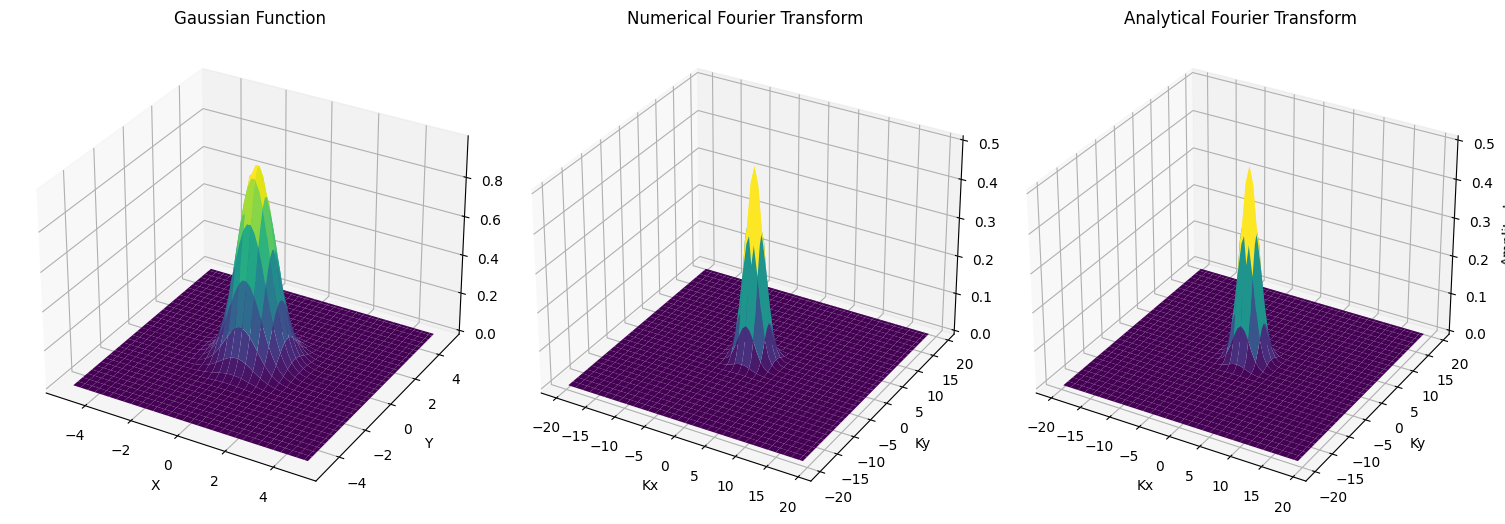

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Gaussian function
def gaussian(x, y):
    return np.exp(-(x**2 + y**2))

# Generate a grid of x and y values
N = 64
xmin = -5
ymin = -5
x = np.linspace(-5, 5, N)
y = np.linspace(-5, 5, N)
X, Y = np.meshgrid(x, y)

# Compute the values of the Gaussian function for each point on the grid
f = gaussian(X, Y)

# Compute the 2D Fourier transform of the Gaussian function
fft_sample = np.fft.fftshift(np.fft.fft2(f, norm='ortho'))

# Create a frequency grid
dx = x[1] - x[0]
dy = y[1] - y[0]
kx = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, dx))
ky = 2 * np.pi * np.fft.fftshift(np.fft.fftfreq(N, dy))
Kx, Ky = np.meshgrid(kx, ky)

# Compute the integral factor exp(-ikx_min)
int_fact = np.exp(-1j * kx * xmin) * np.exp(-1j * ky * ymin)

# Compute the numerical Fourier transform with proper scaling
fft_numerical = fft_sample * dx * dy * int_fact * (N / (2 * np.pi))

# Analytical result of the Fourier transform of the Gaussian function
F_analytical = np.exp(-(Kx**2 + Ky**2) * 0.25) / 2

# Plot both the Gaussian function and the Fourier transforms in the same plot
fig = plt.figure(figsize=(15, 6))

# Plot the Gaussian function
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, f, cmap='viridis')
ax.set_title('Gaussian Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Amplitude')

# Plot the numerical Fourier transform
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(Kx, Ky, np.abs(fft_numerical), cmap='viridis')
ax.set_title('Numerical Fourier Transform')
ax.set_xlabel('Kx')
ax.set_ylabel('Ky')
ax.set_zlabel('Amplitude')

# Plot the analytical Fourier transform
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(Kx, Ky, F_analytical, cmap='viridis')
ax.set_title('Analytical Fourier Transform')
ax.set_xlabel('Kx')
ax.set_ylabel('Ky')
ax.set_zlabel('Amplitude')

plt.tight_layout()
plt.show()

## Q_11
Write a Python code to compute the convolution of the box function:
$$
  f(x) = \begin{cases} 
1 & \text{if } -1 < x < 1 \\
0 & \text{otherwise}
\end{cases} 
$$

with itself. Make a plot that shows the result as well as the above box function.


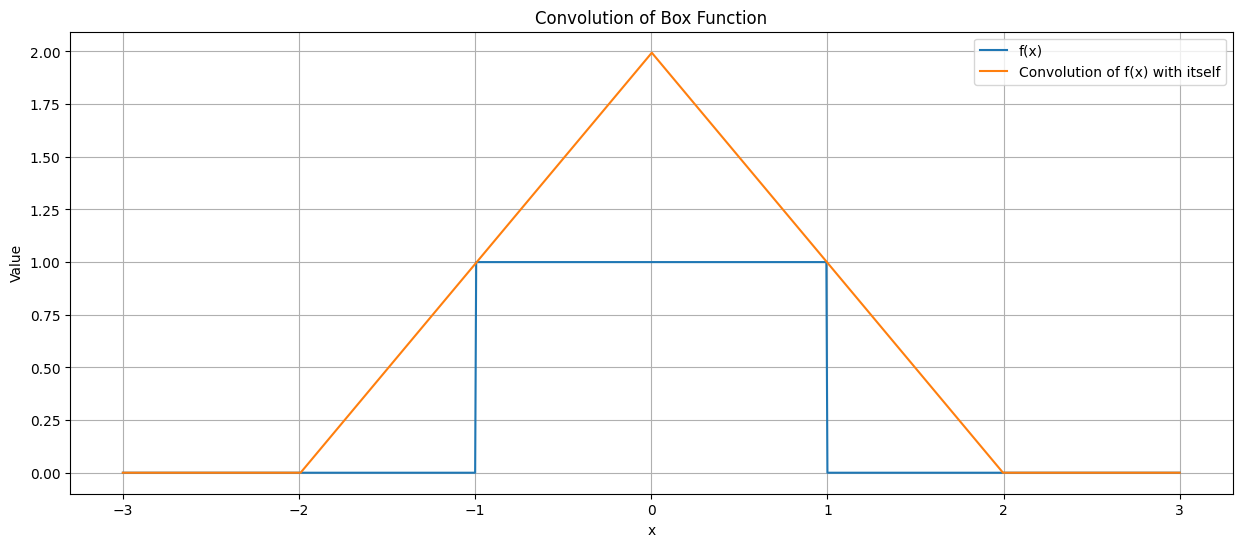

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the box function f(x)
def f(x):
    return np.where(np.logical_and(-1 < x, x < 1), 1, 0)

# Create an array of x values
x = np.linspace(-3, 3, 1000)
dx=(x[1] - x[0])

# Compute the convolution of f(x) with itself
convolution_result = np.convolve(f(x), f(x), mode='same') * dx  


plt.figure(figsize=(15, 6))
plt.plot(x, f(x), label='f(x)')
plt.plot(x, convolution_result, label='Convolution of f(x) with itself')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Convolution of Box Function')
plt.legend()
plt.grid(True)
plt.show()

## Q_12
Compute the convolution of:
$$
 g(x) = \exp(-x^2) 
$$
and
$$
 h(x) = \exp(-4x^2) 
 $$

analytically, and then via DFT using any library of your choice. Make a plot to show that the analytical calculation agrees with its numerical counterpart.


# part a.
 analytical convolution

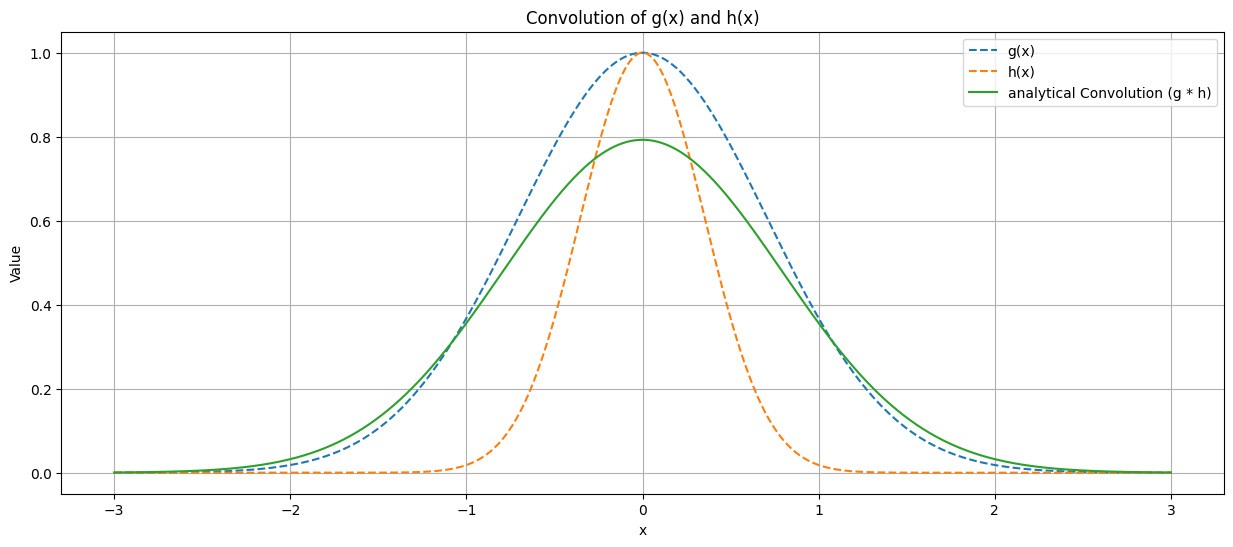

In [36]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return np.exp(-x**2)

def h(x):
    return np.exp(-4*x**2)

def analytical_convolution(x):
    return np.sqrt(np.pi/5) * np.exp(-4*x**2/5) # convolution functin got from intregation 

# Create an array of x values
x_values = np.linspace(-3, 3, 1000)
dx=x_values[1]-x_values[0]

# Compute the analytical  convolution
analytical_convolution = analytical_convolution(x_values)




# Plot the convolution result
plt.figure(figsize=(15, 6))
plt.plot(x_values,g(x_values),label='g(x)',linestyle='--')
plt.plot(x_values,h(x_values),label='h(x)',linestyle='--')
plt.plot(x_values, analytical_convolution, label='analytical Convolution (g * h)')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Convolution of g(x) and h(x)')
plt.legend()
plt.grid(True)
plt.show()

# part b
numerical convolution using DFT

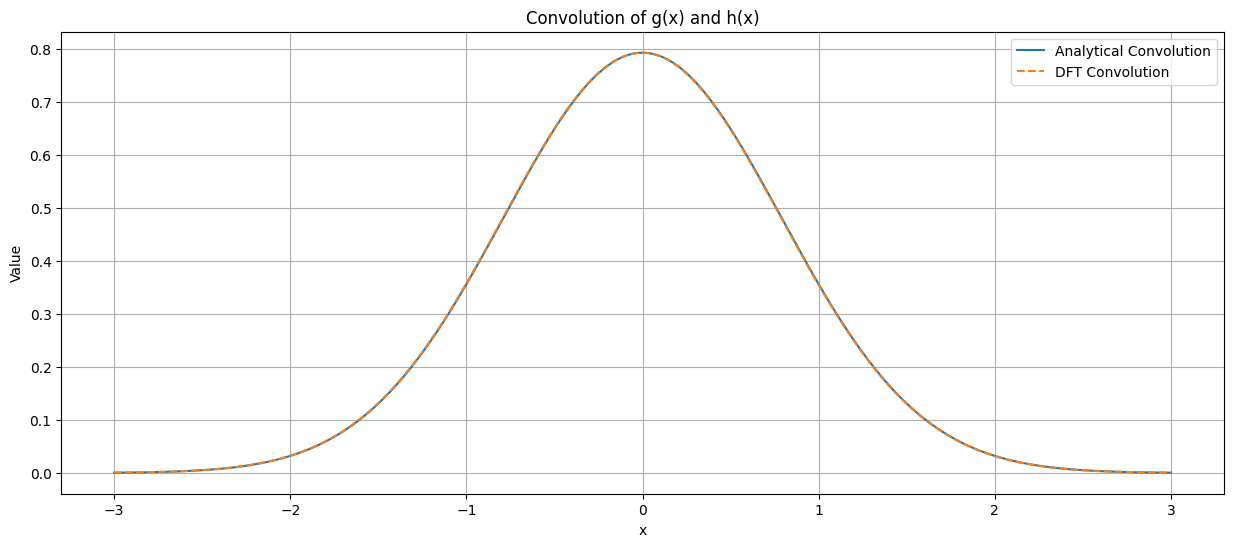

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def g(x):
    return np.exp(-x**2)

def h(x):
    return np.exp(-4*x**2)

def analytical_convolution(x):
    return np.sqrt(np.pi/5) * np.exp(-4*x**2/5)

x_values = np.linspace(-3, 3, 1000)
dx = x_values[1] - x_values[0]

# Compute the DFT of g(x) and h(x)
g_dft = np.fft.fft(g(x_values), norm='ortho')
h_dft = np.fft.fft(h(x_values), norm='ortho')

# Shift the DFTs
g_dft_shifted = np.fft.fftshift(g_dft)
h_dft_shifted = np.fft.fftshift(h_dft)

# Compute the element-wise product of DFTs (convolution in frequency domain)
convolution_dft_shifted = np.fft.ifftshift(np.abs(np.fft.ifft(g_dft_shifted * h_dft_shifted, norm='ortho'))) * dx * np.sqrt(1000)

# Plot the results
plt.figure(figsize=(15, 6))
#plt.plot(x_values, g(x_values), label='g(x)')
#plt.plot(x_values, h(x_values), label='h(x)')
plt.plot(x_values, analytical_convolution(x_values), label='Analytical Convolution')
plt.plot(x_values, convolution_dft_shifted, label='DFT Convolution', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Convolution of g(x) and h(x)')
plt.legend()
plt.grid(True)
plt.show()



## Q_13.
An experiment has reported several independent measurements of a quantity. These
measurements are listed in http://theory.tifr.res.in/~kulkarni/noise.txt. Plot
these measurements. Plot their DFT. Compute their power spectrum using the periodogram. Make a plot of the power spectrum. Bin the power spectrum in ten k bins.
Plot the binned power spectrum.

## part- a.
Plot of these measurements

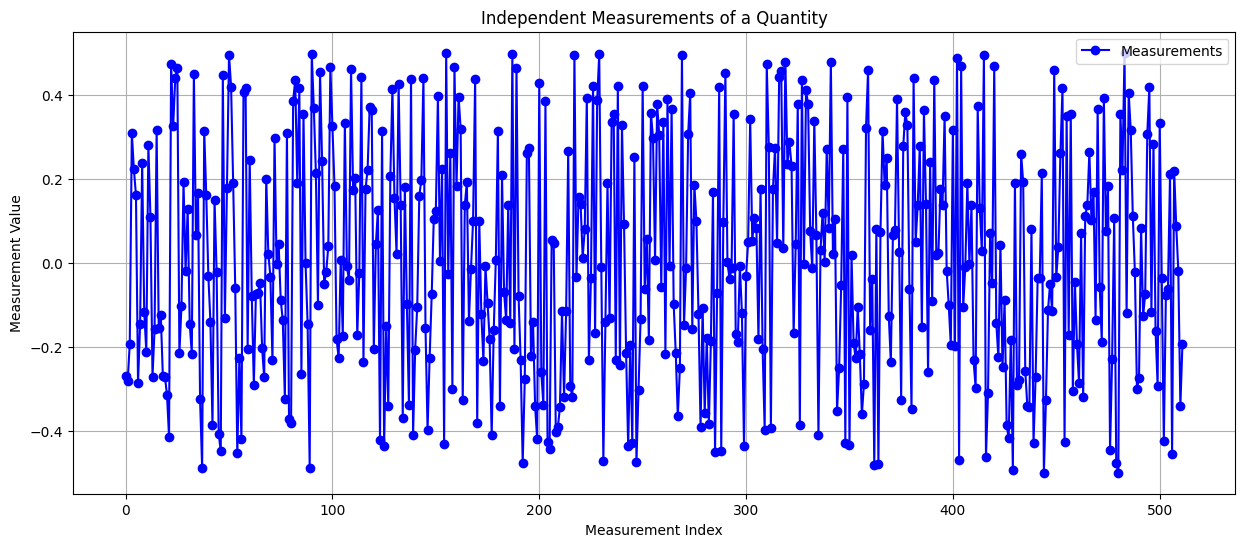

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the data
data_url = "http://theory.tifr.res.in/~kulkarni/noise.txt"
measurements = np.loadtxt(data_url)

# Separate time and noise values
num_samples = len(measurements)
time_values = np.arange(num_samples)  # Assuming time starts from 0 and is evenly spaced
noise_values = measurements

# Plot the measurements with points connected
plt.figure(figsize=(15, 6))
plt.plot(time_values, noise_values, marker='o', linestyle='-', color='b', label='Measurements')
plt.xlabel('Measurement Index')
plt.ylabel('Measurement Value')
plt.title('Independent Measurements of a Quantity')
plt.grid(True)
plt.legend()
plt.show()





## part - b.
plot of the mesured value DFT

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


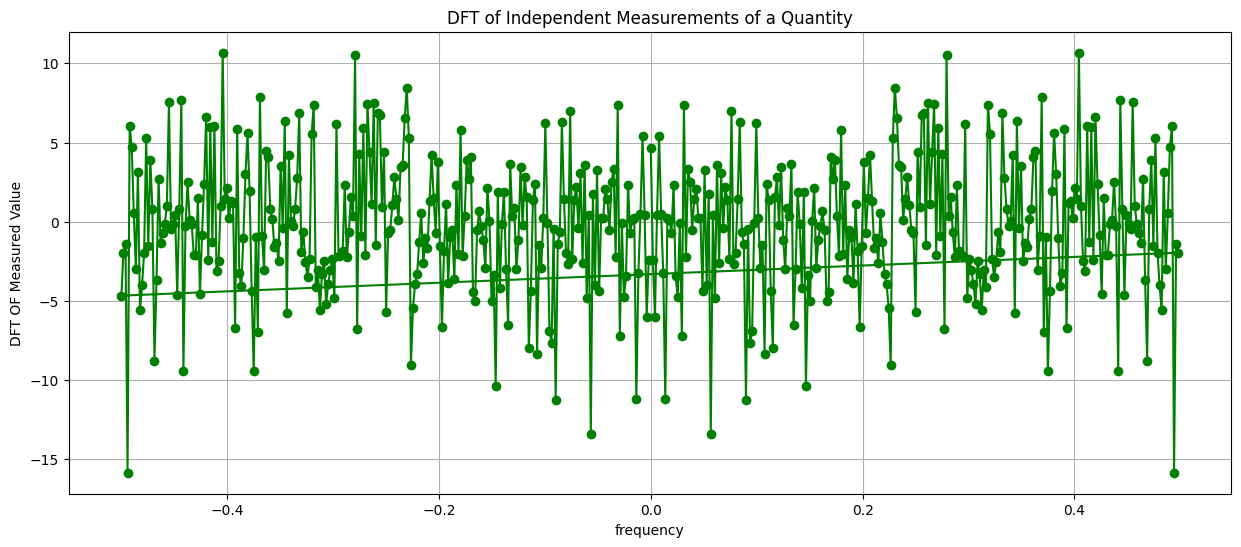

In [12]:
#step 2 calculation of DFT
# Compute the Discrete Fourier Transform (DFT)
dft = np.fft.fft(measurements)
freq = np.fft.fftfreq(len(measurements))

# Plot the Fourier Transform

plt.figure(figsize=(15, 6))
plt.plot(freq,dft, marker='o', linestyle='-', color='g')
plt.xlabel('frequency')
plt.ylabel('DFT OF Measured Value')
plt.title('DFT of Independent Measurements of a Quantity')
plt.grid(True)


## part c.
power spectrum using the periodogram

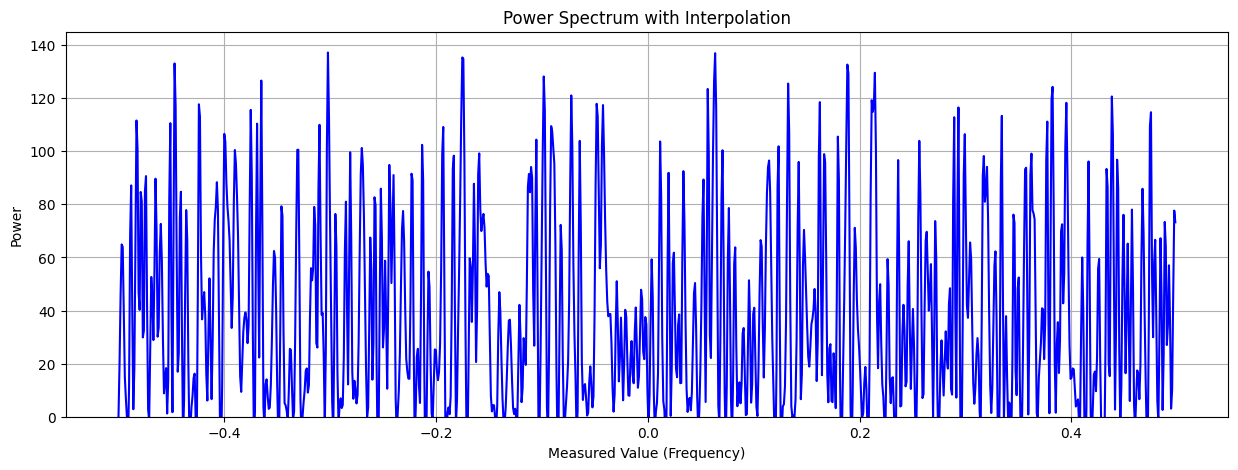

In [11]:
import scipy
from scipy.signal import periodogram
from scipy.interpolate import interp1d

# Step 5: Compute the power spectrum using the periodogram
frequencies, power_spectrum = periodogram(dft)

# Perform cubic spline interpolation
interp_freq = np.linspace(frequencies.min(), frequencies.max(), 1000)
interp_power_spectrum = interp1d(frequencies, power_spectrum, kind='cubic')(interp_freq)

# Plot the power spectrum with interpolated data
plt.figure(figsize=(15, 5))
plt.plot(interp_freq, interp_power_spectrum,color='b')
plt.title("Power Spectrum with Interpolation")
plt.xlabel("Measured Value (Frequency)")
plt.ylabel("Power")
plt.grid(True)
plt.ylim(bottom=0)  # Set the lower limit of the y-axis to zero
plt.show()







## part d.
Plot the ten binned power spectrum

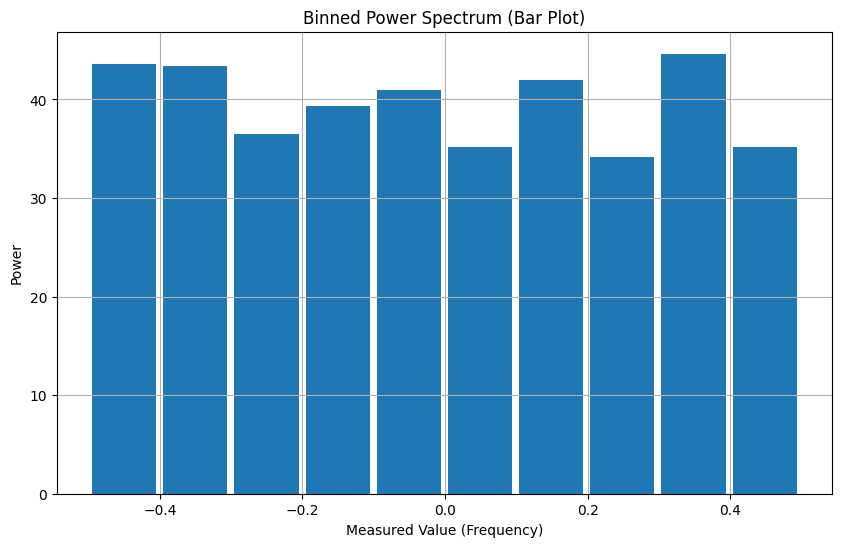

In [19]:
# Step 2: Bin the power spectrum into ten frequency bins
num_bins = 10
bin_edges = np.linspace(frequencies.min(), frequencies.max(), num_bins + 1)
binned_spectrum, _ = np.histogram(frequencies, bins=bin_edges, weights=power_spectrum)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
binned_spectrum /= np.diff(bin_edges)  # Normalize by bin width

# Step 3: Plot the binned power spectrum as a bar plot with separated bins
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, binned_spectrum, width=np.diff(bin_edges) * 0.9, align='center')
plt.title("Binned Power Spectrum (Bar Plot)")
plt.xlabel("Measured Value (Frequency)")
plt.ylabel("Power")
plt.grid(True)
plt.show()


